In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('result_0505-180050.csv', header = None, sep = ':')
data.head(10)

,0,1,2,3,4,5
0,cpu_openvino,1,149.15,6.70,vit_b_16,FP16
1,gpu_openvino,1,244.94,4.08,vit_b_16,FP16
2,cpu_openvino,1,77.89,12.84,vgg11,FP16
3,gpu_openvino,1,17.75,56.34,vgg11,FP16
4,cpu_openvino,1,37.84,26.43,resnet50,FP16
5,gpu_openvino,1,18.01,55.54,resnet50,FP16
6,cpu_openvino,2,367.50,5.44,vit_b_16,FP16
7,gpu_openvino,2,276.65,7.23,vit_b_16,FP16
8,cpu_openvino,2,126.58,15.80,vgg11,FP16
9,gpu_openvino,2,77.60,25.77,vgg11,FP16


In [4]:
data[4].value_counts()

vit_b_16    24
vgg11       24
resnet50    24
Name: 4, dtype: int64

In [5]:
data[0].value_counts()

cpu_openvino    36
gpu_openvino    36
Name: 0, dtype: int64

In [6]:
resnet_data = data[data[4] == 'resnet50']

In [7]:
precision_data = resnet_data[resnet_data[5] == 'FP16']
device_data = precision_data[precision_data[0] == 'gpu_openvino']

In [30]:
p = precision_data[precision_data[0] == 'cpu_openvino'][1]
p.head(10)

4      1
10     2
16     4
22     6
28    10
34    20
Name: 1, dtype: int64

In [8]:
device_data.head(10)

,0,1,2,3,4,5
5,gpu_openvino,1,18.01,55.54,resnet50,FP16
11,gpu_openvino,2,28.85,69.32,resnet50,FP16
17,gpu_openvino,4,46.11,86.76,resnet50,FP16
23,gpu_openvino,6,69.35,86.52,resnet50,FP16
29,gpu_openvino,10,116.81,85.61,resnet50,FP16
35,gpu_openvino,20,223.77,89.38,resnet50,FP16


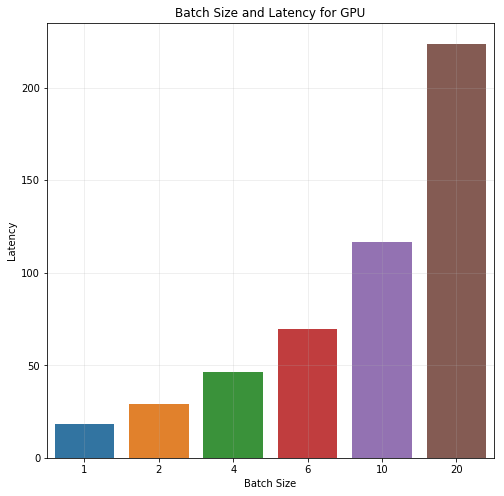

In [33]:
plt.figure(figsize = (8,8))
sns.barplot(x = precision_data[precision_data[0] == 'gpu_openvino'][1], y = precision_data[precision_data[0] == 'gpu_openvino'][2])
plt.title("Batch Size and Latency for GPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Latency")
plt.savefig("batch_size_latency_gpu.svg")
plt.show()

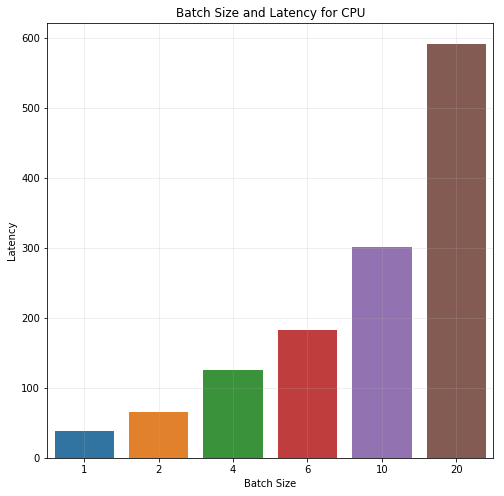

In [34]:
plt.figure(figsize = (8,8))
sns.barplot(x = precision_data[precision_data[0] == 'cpu_openvino'][1], y = precision_data[precision_data[0] == 'cpu_openvino'][2])
plt.title("Batch Size and Latency for CPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Latency")
plt.savefig("batch_size_latency_cpu.svg")
plt.show()

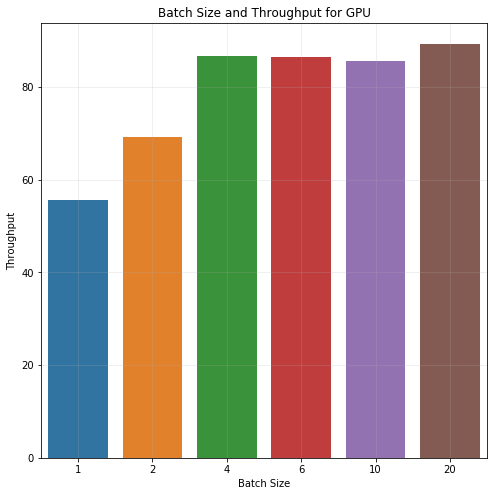

In [35]:
plt.figure(figsize=(8,8))
sns.barplot(x = precision_data[precision_data[0] == 'gpu_openvino'][1], y = precision_data[precision_data[0] == 'gpu_openvino'][3])
plt.title("Batch Size and Throughput for GPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Throughput")
plt.savefig("batch_size_throughput_gpu.svg")
plt.show()

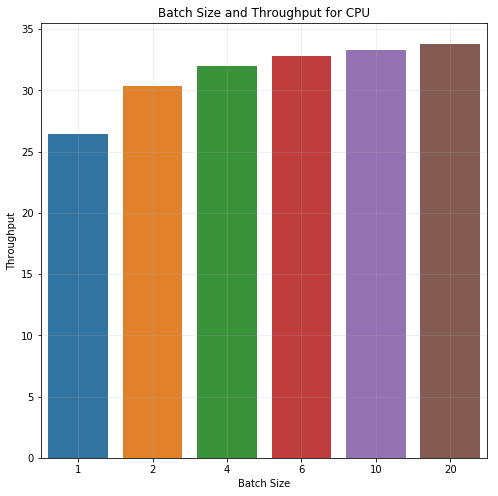

In [36]:
plt.figure(figsize=(8,8))
sns.barplot(x = precision_data[precision_data[0] == 'cpu_openvino'][1], y = precision_data[precision_data[0] == 'cpu_openvino'][3])
plt.title("Batch Size and Throughput for CPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Throughput")
plt.savefig("batch_size_throughput_cpu.svg")
plt.show()